SPAM and HAM Classifcation 

In [1]:
import nltk
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
messages = [i for i in open('SMSSpamCollection')]
print(len(messages))

5574


In [3]:
for num_mess,message in enumerate(messages[:12]):
    print(num_mess,message)
    print(' ')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

 
1 ham	Ok lar... Joking wif u oni...

 
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

 
3 ham	U dun say so early hor... U c already then say...

 
4 ham	Nah I don't think he goes to usf, he lives around here though

 
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv

 
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

 
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

 
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. C

We get to know these values are tab separated so we need to split these into ttwo columns making one as labels and the others as the text message

In [4]:
for num_mess,message in enumerate(messages[:12]):
    
    print(num_mess,message)
    print(' ')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

 
1 ham	Ok lar... Joking wif u oni...

 
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

 
3 ham	U dun say so early hor... U c already then say...

 
4 ham	Nah I don't think he goes to usf, he lives around here though

 
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv

 
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

 
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

 
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. C

In [5]:
df = pd.read_csv('SMSSpamCollection',sep='\t',names = ['labels','text'])

In [6]:
df

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Exploratory Data Analysis 

In [7]:
df['labels'].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

In [8]:
spam_mess = df[df['labels']=='spam']['text'].apply(len)
ham_mess = df[df['labels']=='ham']['text'].apply(len)

c:\users\tejas\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='text', ylabel='Density'>

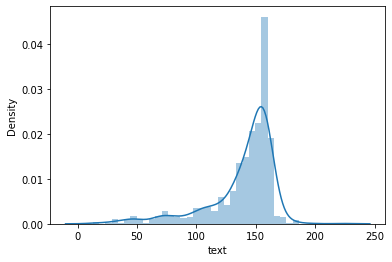

In [9]:
sns.distplot(spam_mess)

We can see here from the graph that the ideal text size for the spam messages is somewhere around 130 to 160

c:\users\tejas\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='text', ylabel='Density'>

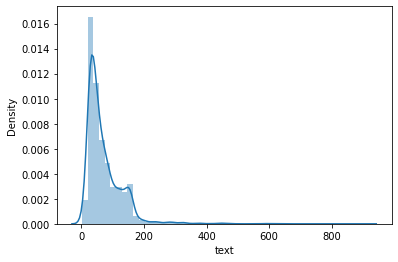

In [10]:
sns.distplot(ham_mess)

And the text length of the ham mesages is somehwere around 0 to 100, as we see there are some messages which are more than 800 in length so lets check the description for that feature. So lets create a separate feature just to denote the length of the messages 

In [11]:
df['text_length']  = df['text'].apply(len)

In [12]:
df['text_length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: text_length, dtype: float64

The longest message here is of the length 910 lets check if its a ham or a spam 

In [13]:
df[df['text_length']==910]

,labels,text,text_length
1085,ham,For me the love should start with attraction.i...,910


Its a HAM !!! Now lets begin with the Text Processing !!

We will be using stop.words package for this one, and perform the text processing!!

In [36]:
import string
from nltk.corpus import stopwords

In [37]:
def process(m):
    no_punctuation = [word for word in m if word not in string.punctuation] 
    no_punctuation="".join(no_punctuation)
    return [text for text in no_punctuation.split() if text.lower() not in stopwords.words('english')]


In [38]:
df.head()

,labels,text,text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [40]:
X=df['text']
y=df['labels']

In [41]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [42]:
pipeline = Pipeline([
    ('bag_of_words', CountVectorizer(analyzer=process)),  # strings to token integer counts
    ('TFIDF', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('Classifier', MultinomialNB()),  # train on TF-IDF vectors with Naive Bayes classifier
])

In [43]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bag_of_words',
                 CountVectorizer(analyzer=<function process at 0x000002067E489790>)),
                ('TFIDF', TfidfTransformer()),
                ('Classifier', MultinomialNB())])

In [44]:
predictions = pipeline.predict(X_test)

In [45]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1207
        spam       1.00      0.76      0.86       186

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.97      1393



[[1207    0]
 [  45  141]]


lets see which one of them is better !!!!